# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles 

l0_sparseness_noise = 200 #shl.n_dictionary #

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag)
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_encode.py) script)

In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None]):
        sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

        # from shl_scripts.shl_tools import print_stats
        # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


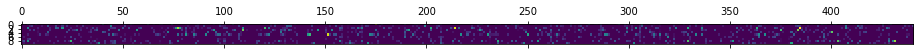

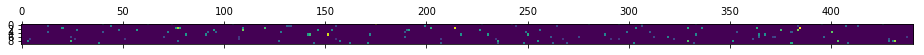

average non-zeros [ 723 2150  573  850  879  427  374  475 2122  383  733  697  779  758
  977  601  541  684  755  621  574  644  728  754  649  812  646  575
  492  625  424  384  352  900 3539  744  341 1201  605  572  537  608
  765 1029  765  605  572  703  498  621  519 1121  617  602 2932  717
  699  285  899  610  767  586  716  407  524  469  390  795 2251  457
  607  907  388  714  718  359  477  766  600  614  694  766 1295  554
  777  741  596  811  320  523  370  782  296  762  341  665  624  479
 1656 1739 1162  888  598  762  706 1031  374  753  721  496  492  694
  578  380  585  616  695  585  473  511]
average non-zeros [141 158  85 141 156  73 127 121 119  81 117 141  98 142 144 124  97 103
 122 122 122 126 141 141 146 159 130 121 125  99 102  87 144 128 291 142
  60 104 114 101 137 137 109 131 138 123  86 142 135 131 127 150 125 115
 183 120 123  89 108 134 144 106 103 116 107 104  88 139 106  76 132  90
 100 116 113  90  87 152 131 120 121 136 137 105 141 110 121 1

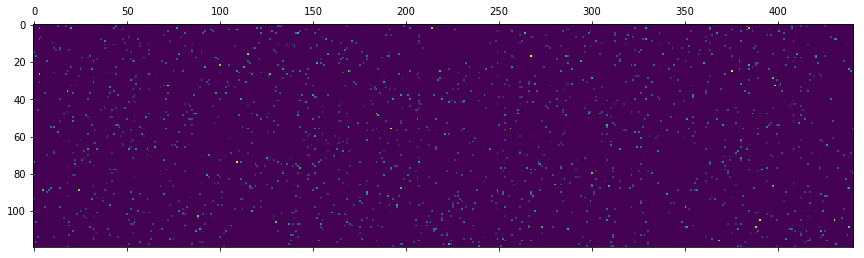

<Figure size 1080x216 with 0 Axes>

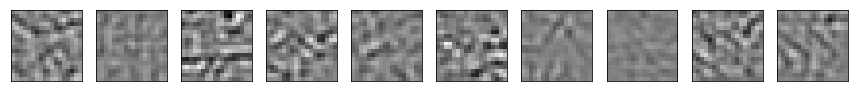

<Figure size 1080x216 with 0 Axes>

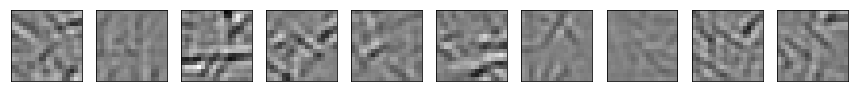

<Figure size 1080x216 with 0 Axes>

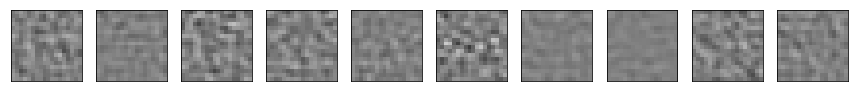

mean deviation of coefficients =  0.08362255736180971 0.03332526640362612 0.03230306345399741
total deviation of coefficients =  0.02145189599938403
mean deviation of quantiles =  0.0031295064999083515
mean deviation of quantiles =  0.0031222563662835364
total deviation of quantiles =  0.00218357101341183
ratio deviation of quantiles =  0.6977365324135855
proba incorrect coefficients =  0.15862829506802723
proba incorrect coefficients (strong) =  0.020170112315759603
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


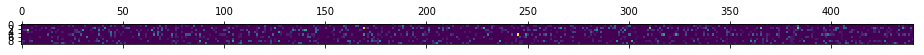

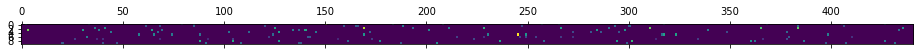

average non-zeros [ 416  707  529 2219 2072  818  452  837  358  635  469  561  926  701
  305 1044  720  614  824  489 2197  557  762  642  762  818  848  497
  880 1069  486  985  659  995  750 1130  596  531  696  573  718  520
  688  697  711  658  723  960  663  594  523  459  570  869  477  579
  758  658 2739  663  246  691  617 1244  699 1031  605  773  732  617
  840  865  623  684 1506  856 3648  769  416 3787  776  633  855  767
  691  498 1241  696  825 1264  655 1531  515 1090  808  556  808 1139
  614  760  616  868 2441  346  835  821  284 1949  831  707  521  534
 1268  753  255  561 3385  799  920  612]
average non-zeros [ 83 147 135 135  51 108 132 134  70  81 112 103 142 121  88 128 112 126
 118  83 173 127 115  90 111 127 146 118 147 123  61 135 119 140 119 143
 124  71 116 100 108 135 131 164 101  80 136 140  56 105  97  81 118 132
 118 145 118 111 144 128  65 123 125  63 100 152 102 121 154 127 108 116
 120  86  98 145 337 128  70 496 152 102 142 128 156  99 149  

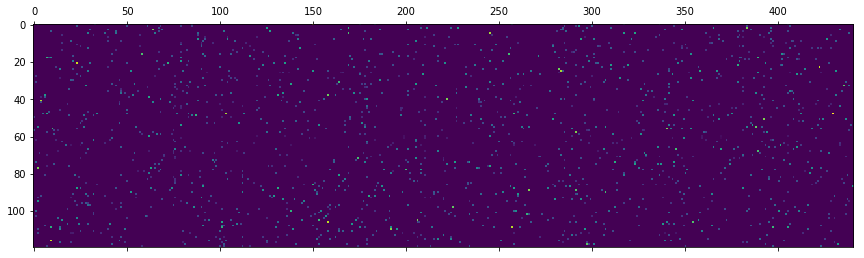

<Figure size 1080x216 with 0 Axes>

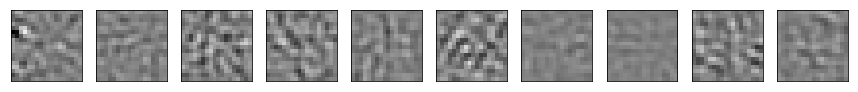

<Figure size 1080x216 with 0 Axes>

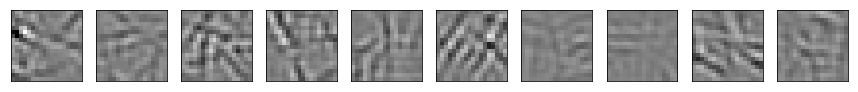

<Figure size 1080x216 with 0 Axes>

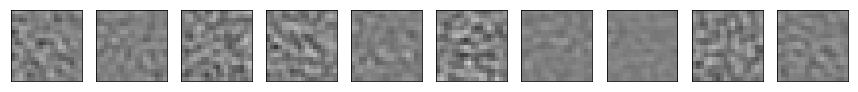

mean deviation of coefficients =  0.08758130387357613 0.03353651181695875 0.03251702205348759
total deviation of coefficients =  0.021806282143995003
mean deviation of quantiles =  0.0031302479371781685
mean deviation of quantiles =  0.00312549222952834
total deviation of quantiles =  0.002173224210828694
ratio deviation of quantiles =  0.6942658391423765
proba incorrect coefficients =  0.18247380332341268
proba incorrect coefficients (strong) =  0.020439165249433122
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


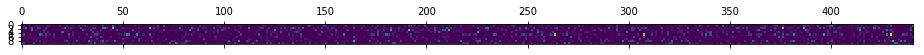

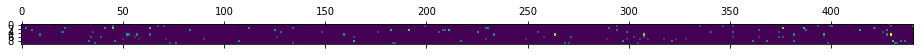

average non-zeros [2157 1748  892 1124 1034 1316 1004  965 2038  938 1042 1303 1209 1586
 1714 1964 1166 1012  620  699  940  890 1461 1151 1750 1089  877  996
 2019  887 1411  827 1095  979 1408 1582 1142 1593 1090 1234 1875 1439
 1032  988 1103 1470 1378  861 1845 1387  861 2252  836  880  845  726
  983 1168 1301  743  744  963  615 1739  921 1141 1306  918  986  984
  916  955 1513 1401  789 1332  710 2210 1139 1429 1100 1260 2017  737
  713 1024 2081 1814 1037  924  739 1129 1054 1099  720 1349 1042  912
  974 2117 1166 1479  634 1225  968 1274 1095 1083 1813 1057  949 1040
 1133 1061  890 1054 2427 1098  737 1096]
average non-zeros [ 92 142 126 133 112 141 123 140 148 113  97 133 140 147 155 162 146 118
 105  89 112  97 143 142 133 142 125 112 140 103 136 120 117 161 142 117
 145 153 133 151 163 161  91  90 105 154 119 104 108 135  80 152  95 112
 117 117  89 149 134 132  69 100  91 146  92 131 126  69 106 128 122  75
 109 165 103 164 127 114 114 138 112 124 110  78 109 111 139 1

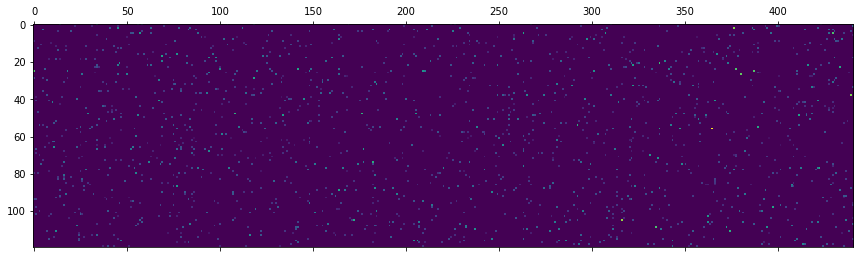

<Figure size 1080x216 with 0 Axes>

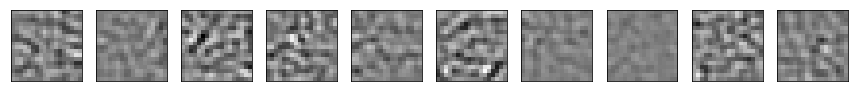

<Figure size 1080x216 with 0 Axes>

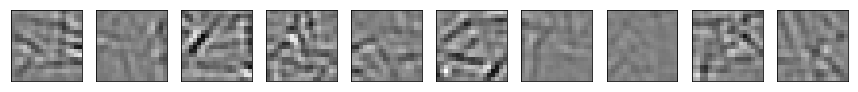

<Figure size 1080x216 with 0 Axes>

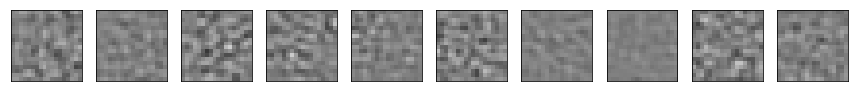

mean deviation of coefficients =  0.10353792658567872 0.03461621185160494 0.0336818240542523
total deviation of coefficients =  0.024258925622249364
mean deviation of quantiles =  0.003132013035250141
mean deviation of quantiles =  0.0031290982565907468
total deviation of quantiles =  0.0022801046080777256
ratio deviation of quantiles =  0.7279997185246783
proba incorrect coefficients =  0.26690770709325395
proba incorrect coefficients (strong) =  0.021690316751700633


In [6]:
def shuffling(data, sparse_code, dico, N_show=10):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, precision=dico.precision, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, shl.l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=120):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, precision=dico.precision, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=True)
    #plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method + 15*'🐶')
    
    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        record = pd.concat((record, record_))


In [7]:
record

,error,aerror,perror,perror_high
None,2.146275,0.697737,0.158628,0.020170
HAP,2.122293,0.694266,0.182474,0.020439
HEH,2.054284,0.728000,0.266908,0.021690


In [8]:
record_

,error,aerror,perror,perror_high
HEH,2.054284,0.728,0.266908,0.02169


## Version used

In [9]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Wed Sep 26 16:41:41 2018 CEST